<a href="https://colab.research.google.com/github/manelnh/ML-zoomcamp-homework/blob/main/MLhomework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2- Machine Learning for Regression

In [1]:
import numpy as np
import pandas as pd

# 2-2 Data Preparation

In [2]:
data ='wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-08 20:39:13--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-10-08 20:39:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.05s   

2025-10-08 20:39:14 (18.1 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]

FINISHED --2025-10-08 20:39:14--
Total wall clock time: 0.3s
Downloaded: 1 files, 854K in 0.05s (18.1 MB/s)


In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['origin', 'fuel_type', 'drivetrain']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


#2-3 EDA

In [444]:
df1 = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df1.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

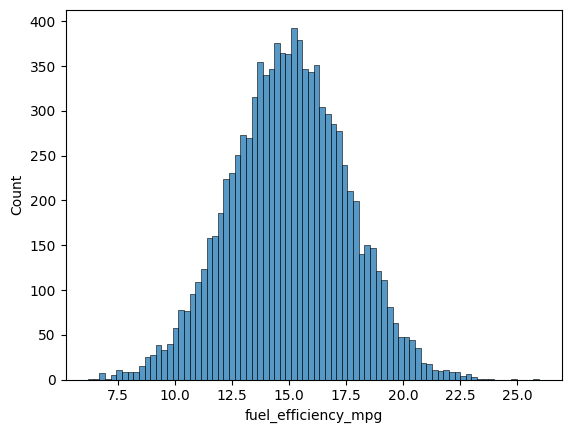

In [119]:
sns.histplot(df1['fuel_efficiency_mpg'], bins=80)

No, variable fuel efficiency mpg does not have a tail

In [399]:
df1.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [121]:
df1['horsepower'].median()

149.0

# 2.4 Setting up the validation framework

In [466]:
n = len(df1)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [467]:
n, n_val ,n_test, n_train

(9704, 1940, 1940, 5824)

In [468]:
idx = np.arange(n)

In [469]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [470]:
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train+n_val]]
df_test = df1.iloc[idx[n_train+n_val:]]

In [450]:
df1.iloc[idx[:10]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
4562,180,120.0,3551.398040,2013,12.145734
5885,210,118.0,3620.351977,2018,11.378399
3746,150,152.0,2524.407794,2012,16.667294
7109,160,151.0,2752.964230,2009,15.819367
2698,250,147.0,3202.856567,2020,14.100998


In [471]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# 2-5 Linear Regression Model

In [491]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]


In [492]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']
X_train = df_train[base].values
y_train = df_train['fuel_efficiency_mpg'].values

In [493]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

In [494]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan]))

Filling missing values with 0

In [495]:
X_train = df_train[base].fillna(0).values

In [496]:
w0, w1= train_linear_regression(X_train, y_train)

In [497]:
w0 + X_train.dot(w)

array([21.23077832, 20.20759204, 21.60988423, ..., 21.46213934,
       22.66481693, 21.75132664])

In [498]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

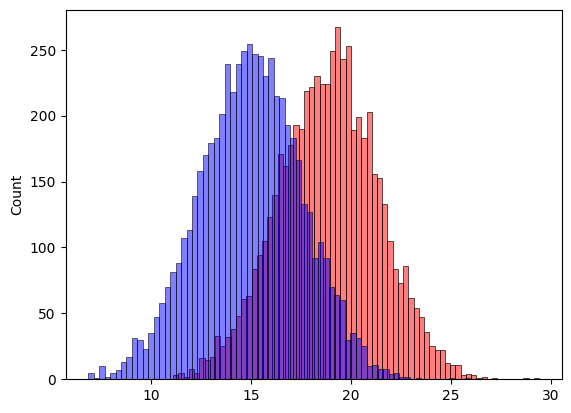

In [499]:
sns.histplot(y_pred, color='red', alpha=0.5 ,bins=70)
sns.histplot(y_train, color='blue', alpha=0.5, bins=70)

In [500]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [501]:
rmse(y_train, y_pred)

np.float64(3.9350497209691677)

Validating the model

In [502]:
X_val = df_val[base].values
y_val = df_val['fuel_efficiency_mpg'].values

In [503]:
def prepare_X(df, base):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [504]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5173782638844466)

Filling missing values with the mean

In [505]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']
X_train = df_train[base].values
y_train = df_train['fuel_efficiency_mpg'].values

In [506]:
median_horsepower = df_train['horsepower'].median()
X_train = df_train[base].fillna(median_horsepower)

In [507]:
w0, w1= train_linear_regression(X_train, y_train)

In [508]:
w0 + X_train.dot(w)

,0
0,17.432823
1,16.390523
2,17.796411
3,11.570059
4,19.329020
...,...
5819,17.062715
5820,10.036859
5821,17.642973
5822,18.880436


In [509]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

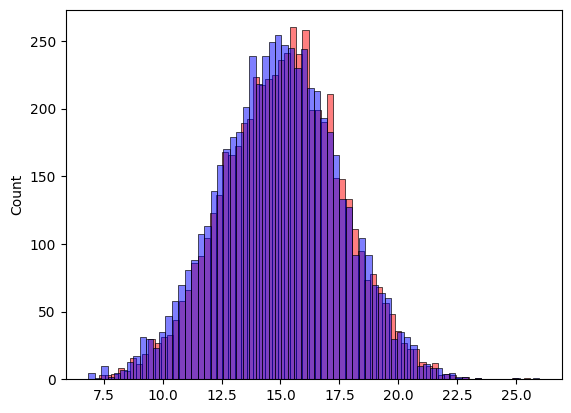

In [510]:
sns.histplot(y_pred, color='red', alpha=0.5 ,bins=70)
sns.histplot(y_train, color='blue', alpha=0.5, bins=70)

In [511]:
rmse(y_train, y_pred)

np.float64(0.5191956123034966)

#Regularized linear regression:Trying different values of r

In [512]:
def train_linear_regression_reg(X,y,r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np .eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]


In [513]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5171115525769823)

In [514]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5222348802093141)

In [515]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5229812979636599)

In [516]:
X_train = prepare_X(df_train, base)
w0, w = train_linear_regression_reg(X_train, y_train, r=100)

X_val = prepare_X(df_val, base)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5230636233819933)

#Question 5: Trying different values of seed

In [539]:
seeds = [0,1,2,3,4,5,6,7,8,9]
rmse_scores = []

for seed in seeds:
    n = len(df1)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df1.iloc[idx[:n_train]]
    df_val = df1.iloc[idx[n_train:n_train+n_val]]
    df_test = df1.iloc[idx[n_train+n_val:]]

    base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
    X_train = df_train[base].fillna(0).values
    y_train = df_train['fuel_efficiency_mpg'].values

    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val[base].fillna(0).values
    y_val = df_val['fuel_efficiency_mpg'].values

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

print("RMSE scores for seeds:", rmse_scores)
print("Standard deviation:", round(np.std(rmse_scores), 3))

RMSE scores for seeds: [np.float64(0.5206531296294218), np.float64(0.521338891285577), np.float64(0.5228069974803171), np.float64(0.515951674119676), np.float64(0.5109129460053851), np.float64(0.52834064601107), np.float64(0.5313910658146311), np.float64(0.5090670387381733), np.float64(0.5147399129511132), np.float64(0.5131865908224594)]
Standard deviation: 0.007
